In [ ]:
!pip install ultralytics

In [6]:
# Code for showing detected fields on image by models
from PIL import Image, ImageDraw, ImageFont
import numpy as np

def display_img(result):
    res = result[0]

    img_array = res.orig_img
    img = Image.fromarray(img_array)

    draw = ImageDraw.Draw(img)

    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)] # Red, Green, Blue, Yellow, Magenta

    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except IOError:
        font = ImageFont.load_default()

    for i, box in enumerate(res.boxes):
        class_id = int(box.cls[0])
        conf = box.conf[0].item()
        xyxy = box.xyxy[0].tolist()

        x1, y1, x2, y2 = [int(val) for val in xyxy]
        label = f"{res.names[class_id]}: {conf:.2f}"
        color = colors[class_id % len(colors)] 

        draw.rectangle([x1, y1, x2, y2], outline=color, width=3)

        bbox = draw.textbbox((0, 0), label, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        draw.rectangle([x1, y1 - text_height - 5, x1 + text_width + 5, y1], fill=color)

        draw.text((x1 + 2, y1 - text_height - 3), label, fill=(255, 255, 255), font=font)

    display(img)

In [ ]:
#AADHAR_CARD_OCR
from re import I
from ultralytics import YOLO


Aadhar_Yaml='datasets/aadhar_fields/data.yaml'

pretrained_model="yolov8n.pt"

project='aadhar_field_detection'

run_name='aadhaar_ocr'

def train():
  model=YOLO(pretrained_model)

  model.train(
      data=Aadhar_Yaml,
      epochs=80,
      imgsz=640,
      batch=16,
      lr0=0.001,
      project=project,
      name=run_name,
      optimizer="Adam",
      pretrained=True,
      augment=True,
      hsv_h=0.0015,
      hsv_s=0.7,
      hsv_v=0.4,
      translate=0.1,
      scale=0.4,
      mosaic=1.0, # Corrected 'mosic' to 'mosaic'
      mixup=0.2
  )

  print("\nTraining Complete!")
  print(f"model saved at : {project}/{run_name}/weights/best.pt\n")

if __name__=="__main__":
  train()

In [1]:
# testing aadhar card ocr
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [2]:
aadhar_model=YOLO(r'../models/aadhar_ocr_detector.pt')

In [9]:
result=aadhar_model(r'../datasets/aadhar_fields/test/images//aadhar1.jpg')


image 1/1 c:\shivraj\document-ai\notebooks\..\datasets\aadhar_fields\test\images\aadhar1.jpg: 640x640 1 0, 1 1, 1 2, 1 3, 312.4ms
Speed: 9.1ms preprocess, 312.4ms inference, 24.5ms postprocess per image at shape (1, 3, 640, 640)


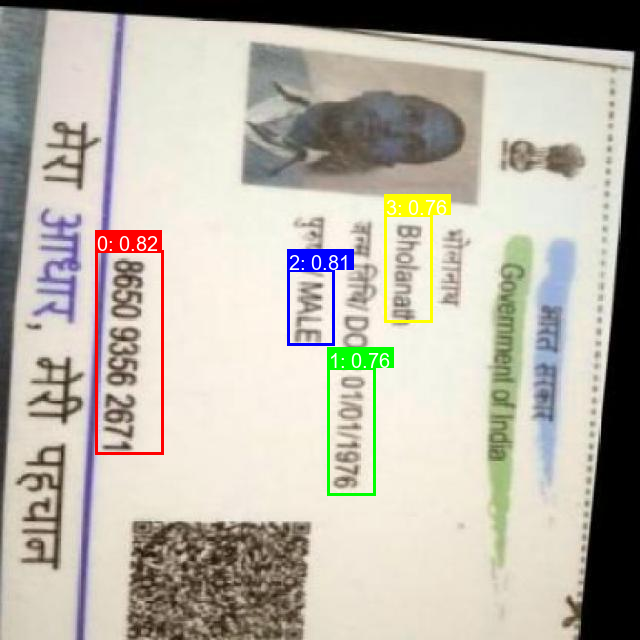

In [10]:
display_img(result)

In [ ]:
#PAN_OCR


PAN_Yaml='datasets/pan_fields/data.yaml'

pretrained_model="yolov8n.pt"

project='pan_field_detection'

run_name='pan_ocr'

def train():
  model=YOLO(pretrained_model)
  model.train(
      data=PAN_Yaml, 
      epochs=80,
      imgsz=640,
      batch=16,
      lr0=0.001,
      project=project,
      name=run_name,
      optimizer="Adam",
      pretrained=True,
      augment=True,
      hsv_h=0.0015,
      hsv_s=0.7,
      hsv_v=0.4,
      translate=0.1,
      scale=0.4,
      mosaic=1.0,
      mixup=0.2
  )
  print("\n Training Complete!")
  print(f"model save at:{project}/{run_name}/weights/best.pt\n")

if __name__=="__main__":
  train()

In [12]:
pan_model=YOLO(r'../models/pan_ocr_detector.pt')

In [14]:
result=pan_model.predict(r'../datasets/pan_fields/test/images/pan1.jpg')


image 1/1 c:\shivraj\document-ai\notebooks\..\datasets\pan_fields\test\images\pan1.jpg: 640x640 1 dob, 1 father_name, 1 name, 1 pan_number, 240.6ms
Speed: 6.8ms preprocess, 240.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


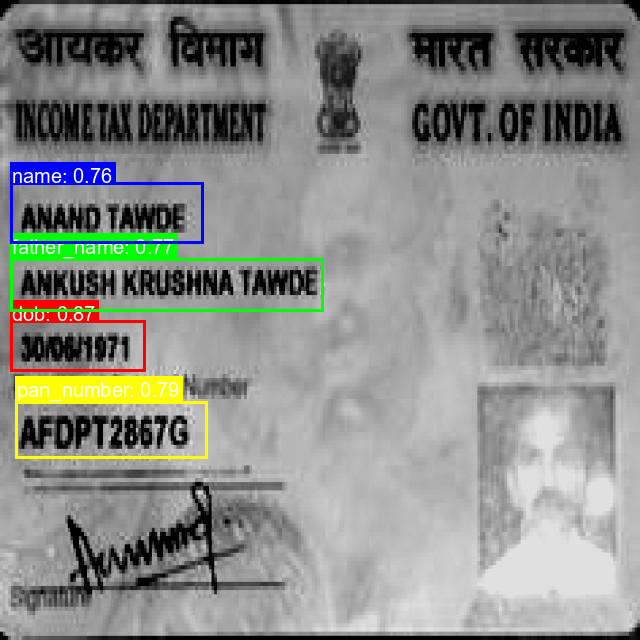

In [15]:
display_img(result)

In [ ]:

voter_Yaml='dataset/voter_fields/data.yaml'

pretrained_model="yolov8n.pt"

project='voter_field_detection'

run_name='voter_ocr'

def train():
  model=YOLO(pretrained_model)

  model.train(
      data=Aadhar_Yaml,
      epochs=80,
      imgsz=640,
      batch=16,
      lr0=0.001,
      project=project,
      name=run_name,
      optimizer="Adam",
      pretrained=True,
      augment=True,
      hsv_h=0.0015,
      hsv_s=0.7,
      hsv_v=0.4,
      translate=0.1,
      scale=0.4,
      mosaic=1.0, # Corrected 'mosic' to 'mosaic'
      mixup=0.2
  )

  print("\nTraining Complete!")
  print(f"model saved at : {project}/{run_name}/weights/best.pt\n")

if __name__=="__main__":
  train()

In [16]:
voter_model=YOLO(r'../models/voter_ocr_detector.pt')

In [20]:
img=voter_model.predict(r'../datasets/voter_fields/test/images/voter.jpg')


image 1/1 c:\shivraj\document-ai\notebooks\..\datasets\voter_fields\test\images\voter.jpg: 640x640 1 age, 1 card_voterid_1_front, 1 election, 1 father, 1 gender, 2 names, 1 portrait, 1 symbol, 1 voter_id, 485.0ms
Speed: 7.1ms preprocess, 485.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


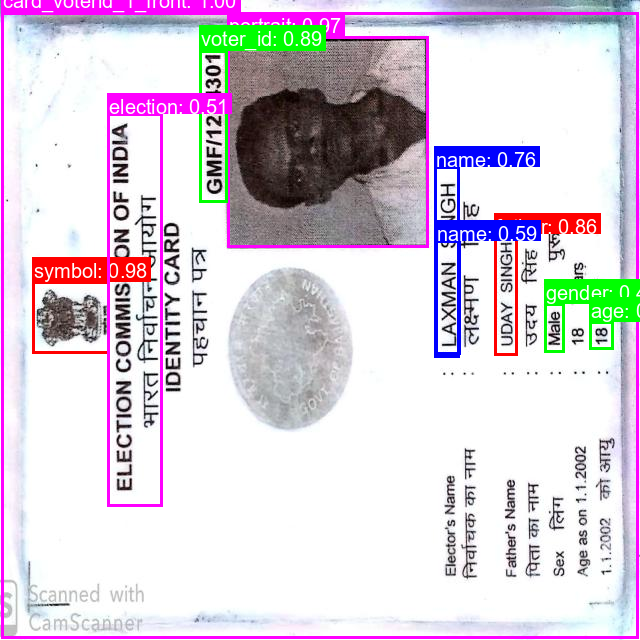

In [21]:
display_img(img)